In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
# My method is to query among the dates and sort them in descending order while showing me the first result
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

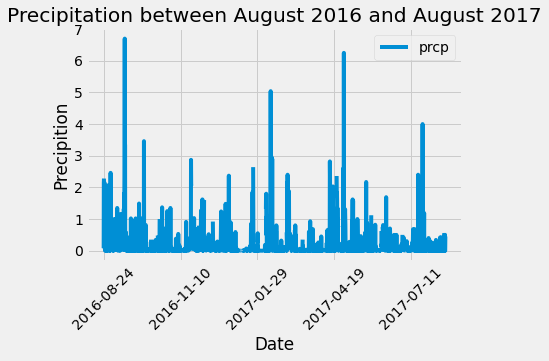

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
recent_year = dt.date(2017,8, 23) - dt.timedelta(days = 365)
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > recent_year).\
order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
# df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
precip_df = pd.DataFrame(precipitation,columns=['date','prcp'])
precip_df.head()
# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date', ascending=True)
precip_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('date','prcp')
plt.title('Precipitation between August 2016 and August 2017')
plt.xlabel('Date')
plt.ylabel('Precipition')
plt.xticks(rotation = 45)
plt.savefig("Resources/Precipitation_By_Date.png")



In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Using describe for a quick view into the summary statistics
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset
# We have 9 Stations with using the Count function
Station_Count = session.query(Station).count()
Station_Count

9

In [39]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_Stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Active_Stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# We know from the previous query that the most active station was USC00519281 so we are going to use that in our filter.
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# To filter down to the timeframe I need, I just set the minimum begin date and the maximum end date 
station_details = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == 'USC00519281').all()
# Cononvert to dataframe
Station_df = pd.DataFrame(station_details)
Station_df

,0,1,2
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0
...,...,...,...
346,USC00519281,2017-08-14,77.0
347,USC00519281,2017-08-15,77.0
348,USC00519281,2017-08-16,76.0
349,USC00519281,2017-08-17,76.0


In [43]:
# Plotting dataframe on a histogram
Station_df.set_index('date')
Station_df.plot.hist(bins=12)
plt.title("Most Active Station Analysis from August 2016 to August 2017")
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.savefig("Resources/Most_Active_Station.png")

KeyError: "None of ['date'] are in the columns"

# Close session

In [21]:
# Close Session
session.close()